<a href="https://colab.research.google.com/github/Mohame-d04/Travel-with-AI/blob/master/FinalProjectAI_Red_Light_Camera_Violations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Red-Light-Camera-Violations***

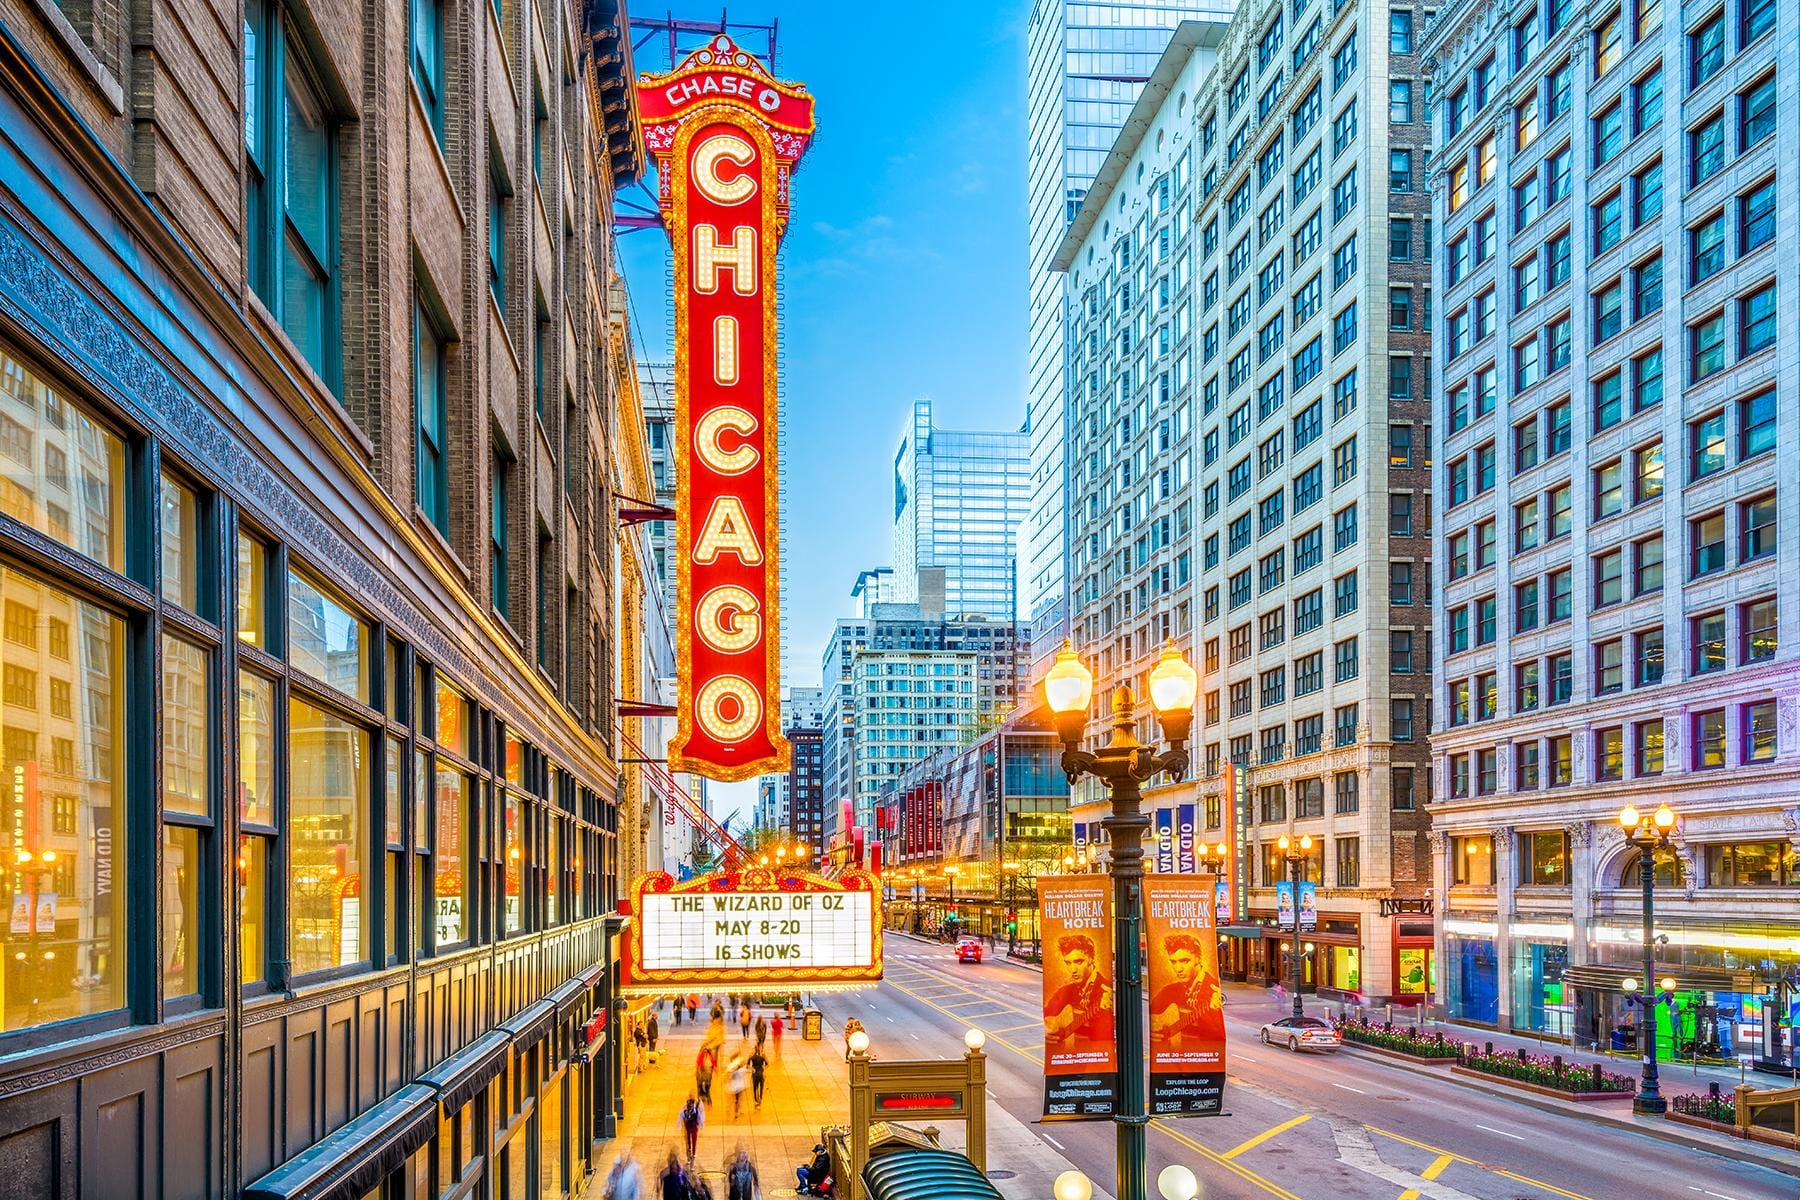

In [ ]:
#Importing our dataset from csv file
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/RedLightCameraViolations (1).csv')
df.head(n=15)

,INTERSECTION,CAMERA ID,ADDRESS,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,31ST ST AND MARTIN LUTHER KING DRIVE,2121.0,3100 S DR MARTIN L KING,2014-08-02T00:00:00,16,NaN,NaN,NaN,NaN,NaN
1,MADISON AND CENTRAL,1751.0,0 S CENTRAL AVENUE,2014-07-15T00:00:00,5,NaN,NaN,NaN,NaN,NaN
2,HOMAN/KIMBALL AND NORTH,1771.0,1600 N HOMAN AVENUE,2014-07-27T00:00:00,1,NaN,NaN,NaN,NaN,NaN
3,IRVING PARK AND LARAMIE,1533.0,5200 W IRVING PARK ROA,2014-08-07T00:00:00,6,NaN,NaN,NaN,NaN,NaN
4,ASHLAND AND MADISON,1911.0,0 N ASHLAND AVE,2014-07-23T00:00:00,1,NaN,NaN,NaN,NaN,NaN
5,IRVING PARK AND KILPATRICK,2763.0,4700 W IRVING PARK ROA,2014-07-11T00:00:00,8,NaN,NaN,NaN,NaN,NaN
6,ASHLAND AND DIVERSEY,1623.0,1600 W DIVERSEY PARKWA,2014-07-04T00:00:00,3,NaN,NaN,NaN,NaN,NaN
7,ELSTON AND IRVING PARK,1503.0,3700 W IRVING PARK ROA,2014-07-26T00:00:00,5,NaN,NaN,NaN,NaN,NaN
8,IRVING PARK AND LARAMIE,1533.0,5200 W IRVING PARK ROA,2014-08-01T00:00:00,2,NaN,NaN,NaN,NaN,NaN
9,31ST AND CALIFORNIA,2064.0,2800 W 31ST,2014-07-13T00:00:00,1,NaN,NaN,NaN,NaN,NaN


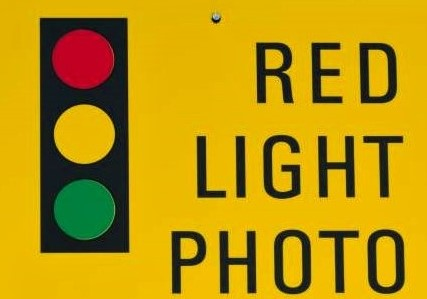


In [ ]:
df.shape

(423260, 10)

In [ ]:
a=list(df.columns)
b=[]
for i in a:
    c=df[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,INTERSECTION,0
1,CAMERA ID,552
2,ADDRESS,0
3,VIOLATION DATE,0
4,VIOLATIONS,0
5,X COORDINATE,24895
6,Y COORDINATE,24895
7,LATITUDE,24895
8,LONGITUDE,24895
9,LOCATION,24895


It has  ***10*** columns and nearly ***423260*** entries and with the inequality in numbers of observations from each feature it is clear that it has got some ***null*** values. Lets try to fix them up and try to solve the problem.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423260 entries, 0 to 423259
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   INTERSECTION    423260 non-null  object 
 1   CAMERA ID       422708 non-null  float64
 2   ADDRESS         423260 non-null  object 
 3   VIOLATION DATE  423260 non-null  object 
 4   VIOLATIONS      423260 non-null  int64  
 5   X COORDINATE    398365 non-null  float64
 6   Y COORDINATE    398365 non-null  float64
 7   LATITUDE        398365 non-null  float64
 8   LONGITUDE       398365 non-null  float64
 9   LOCATION        398365 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 32.3+ MB


In [ ]:
df["CAMERA ID"].value_counts()

1721.0    1587
2054.0    1585
1514.0    1582
1812.0    1579
1652.0    1579
          ... 
1862.0     117
1062.0     115
2174.0     107
8313.0       6
8304.0       3
Name: CAMERA ID, Length: 365, dtype: int64

In [ ]:
df['LOCATION'].value_counts()

{'needs_recoding': False, 'longitude': '-87.64697268601648', 'human_address': '{"address":"","city":"","state":"","zip":""}', 'latitude': '41.86726309836901'}     3161
{'needs_recoding': False, 'longitude': '-87.66829436339881', 'human_address': '{"address":"","city":"","state":"","zip":""}', 'latitude': '41.92519388981048'}     3148
{'needs_recoding': False, 'longitude': '-87.65533580655139', 'human_address': '{"address":"","city":"","state":"","zip":""}', 'latitude': '41.98564979859328'}     3131
{'needs_recoding': False, 'longitude': '-87.67738324739636', 'human_address': '{"address":"","city":"","state":"","zip":""}', 'latitude': '41.903298792681944'}    3100
{'needs_recoding': False, 'longitude': '-87.58623428506996', 'human_address': '{"address":"","city":"","state":"","zip":""}', 'latitude': '41.75689717260223'}     3080
                                                                                                                                                                

**This piece of codes will fill the null values of the selected feature with its mean.**

In [ ]:
df['X COORDINATE'].fillna(df['X COORDINATE'].mean(),inplace=True)
df['Y COORDINATE'].fillna(df['Y COORDINATE'].mean(),inplace=True)
df['LATITUDE'].fillna(df['LATITUDE'].mean(),inplace=True)
df['LONGITUDE'].fillna(df['LONGITUDE'].mean(),inplace=True)

**This piece of codes will fill the null values of 'LOCATION' with '800 W ROOSEVELT ROAD'.**

In [ ]:
number_of_elements =len(df['LOCATION'])
print("number of elements: ", number_of_elements)
df['LOCATION'].fillna('800 W ROOSEVELT ROAD ',inplace=True)

number of elements:  423260


**This piece of codes will fill the null values of 'CAMERA ID' with '1721.0'.**

In [ ]:
number_of_elements =len(df['CAMERA ID'])
print("number of elements: ", number_of_elements)
df['CAMERA ID'].fillna('1721.0 ',inplace=True)

number of elements:  423260


In [ ]:
a=list(df.columns)
b=[]
for i in a:
    c=df[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,INTERSECTION,0
1,CAMERA ID,0
2,ADDRESS,0
3,VIOLATION DATE,0
4,VIOLATIONS,0
5,X COORDINATE,0
6,Y COORDINATE,0
7,LATITUDE,0
8,LONGITUDE,0
9,LOCATION,0


In [ ]:
df.head(n=3)

,INTERSECTION,CAMERA ID,ADDRESS,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,31ST ST AND MARTIN LUTHER KING DRIVE,2121,3100 S DR MARTIN L KING,2014-08-02T00:00:00,16,1.157426e+06,1.898868e+06,41.878245,-87.697463,800 W ROOSEVELT ROAD
1,MADISON AND CENTRAL,1751,0 S CENTRAL AVENUE,2014-07-15T00:00:00,5,1.157426e+06,1.898868e+06,41.878245,-87.697463,800 W ROOSEVELT ROAD
2,HOMAN/KIMBALL AND NORTH,1771,1600 N HOMAN AVENUE,2014-07-27T00:00:00,1,1.157426e+06,1.898868e+06,41.878245,-87.697463,800 W ROOSEVELT ROAD



# ***Now you're ready to use the plotting functions to visualize the data. *`**

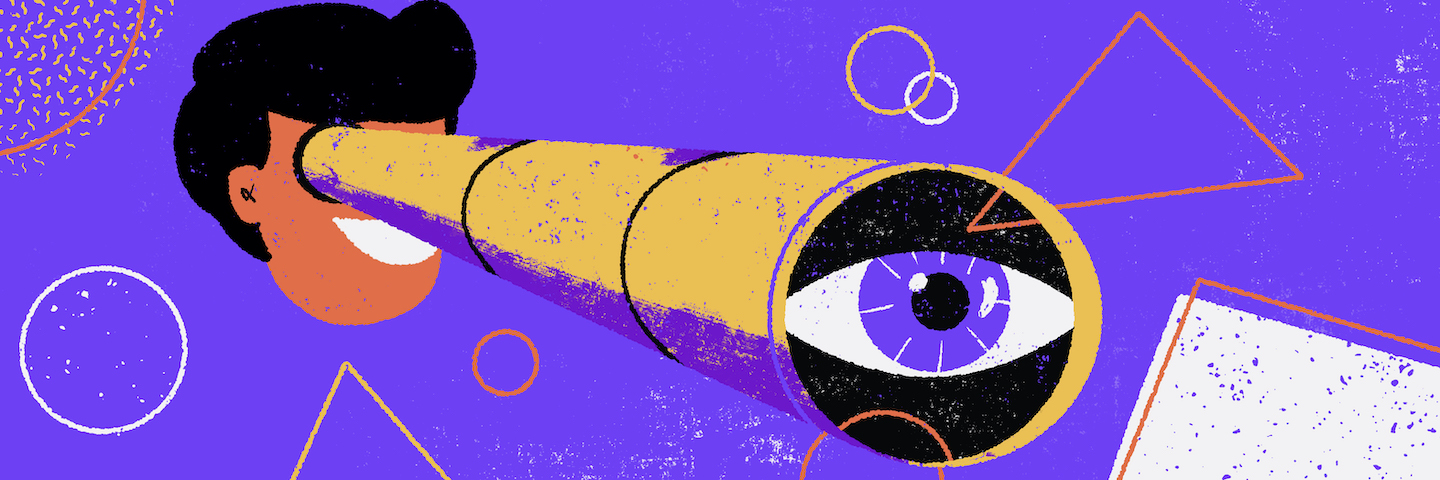

### ***Visualization part***

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Correlation Matrix')

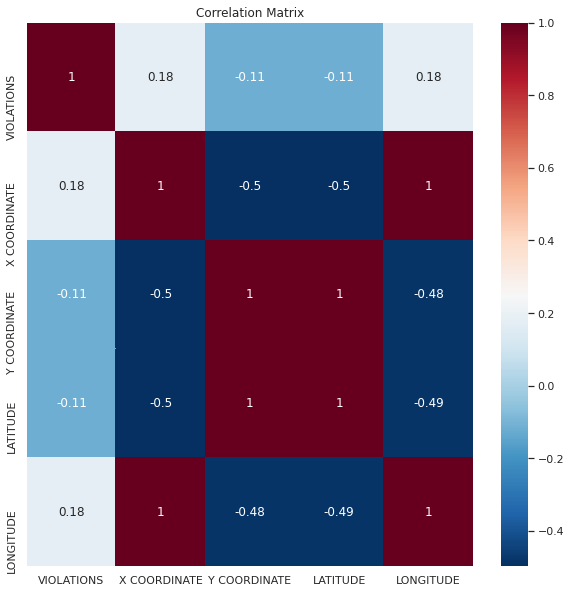

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.title('Correlation Matrix')

## ***The red blocks represets that there is a strong relationship between those attributes.***

###     As we can see there is a strong relationship between'X COORDINATE' and 'LONGITUDE' .

###     And there is a strong relationship too between 'Y COORDINATE' and 'LATITUDE'.


### ***X COORDINATE,LONGITUDE columns***

***Checking the correlation between 'X COORDINATE' and 'LONGITUDE':***

array([[1.        , 0.99989247],
       [0.99989247, 1.        ]])

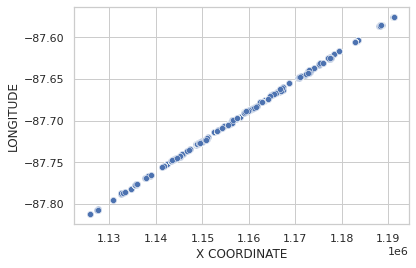

In [ ]:
import numpy as np
sns.scatterplot(x=df['X COORDINATE'],y=df['LONGITUDE'])

np.corrcoef(df.loc[:,'X COORDINATE'],df.loc[:,'LONGITUDE'])

### ***Y COORDINATE,LATITUDE columns***

***Checking the correlation between 'Y COORDINATE' and 'LATITUDE':***

array([[1.        , 0.99999563],
       [0.99999563, 1.        ]])

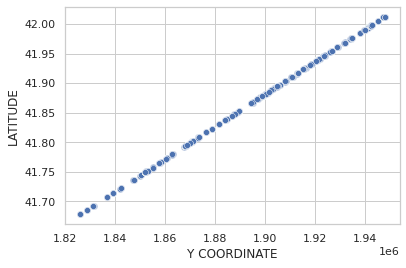

In [ ]:
sns.scatterplot(x=df['Y COORDINATE'],y=df['LATITUDE'])

np.corrcoef(df.loc[:,'Y COORDINATE'],df.loc[:,'LATITUDE'])

 I used LATITUDE and Y COORDINATE columns to create a more useful feature.

In [ ]:
new=pd.DataFrame()
new["Y COORDINATE+LATITUDE"]=df["Y COORDINATE"]+df["LATITUDE"]
df["Y COORDINATE+LATITUDE"]=new

 I used LANGITUDE and X COORDINATE columns to create a more useful feature.

In [ ]:
new1=pd.DataFrame()
new1["X COORDINATE+LONGITUDE"]=df["X COORDINATE"]+df["LONGITUDE"]
df["X COORDINATE+LONGITUDE"]=new1

In [ ]:
df.head(n=1)

,INTERSECTION,CAMERA ID,ADDRESS,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,Y COORDINATE+LATITUDE,X COORDINATE+LONGITUDE
0,31ST ST AND MARTIN LUTHER KING DRIVE,2121,3100 S DR MARTIN L KING,2014-08-02T00:00:00,16,1.157426e+06,1.898868e+06,41.878245,-87.697463,800 W ROOSEVELT ROAD,1.898910e+06,1.157338e+06


__________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



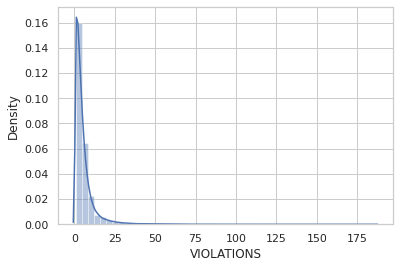

In [ ]:
sns.distplot(df['VIOLATIONS']);

I added a violation year column.

In [ ]:
 i=0
 for elt in df['VIOLATION DATE']:
   df.iloc[i,3]=int(elt.split('-')[0])
   i+=1

In [ ]:
df['VIOLATION DATE'].value_counts()

2016    98546
2015    96088
2017    95339
2018    80927
2014    52360
Name: VIOLATION DATE, dtype: int64

In [ ]:
df.rename({'VIOLATION DATE':'VIOLATION YEAR'},axis=1,inplace=True)

In [ ]:
df.head(n=1)

,INTERSECTION,CAMERA ID,ADDRESS,VIOLATION YEAR,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,Y COORDINATE+LATITUDE,X COORDINATE+LONGITUDE
0,31ST ST AND MARTIN LUTHER KING DRIVE,2121,3100 S DR MARTIN L KING,2014,16,1.157426e+06,1.898868e+06,41.878245,-87.697463,800 W ROOSEVELT ROAD,1.898910e+06,1.157338e+06


_____________________________________________________________________________________________________________________________________________________________________________

### ***VIOLATION YEAR column***

In [ ]:
import plotly
import plotly.graph_objs as go
import plotly.offline as py

Text(0.5, 1.0, 'General Looking on VIOLATIONS in Years')

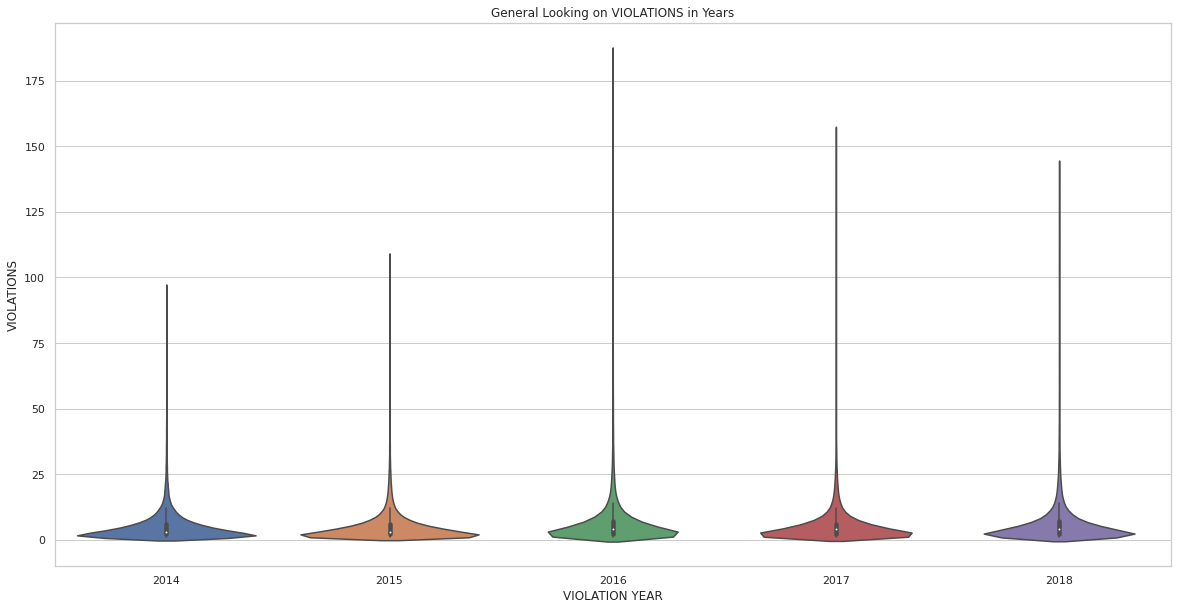

In [ ]:
plt.figure(figsize=(20,10))
sns.violinplot(x=df["VIOLATION YEAR"], y=df['VIOLATIONS'], data=df)
plt.title('General Looking on VIOLATIONS in Years')

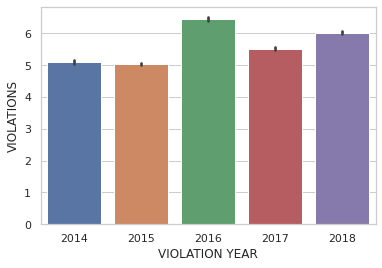

In [ ]:
sns.barplot(x=df.loc[:,'VIOLATION YEAR'], y=df.loc[:,'VIOLATIONS'])

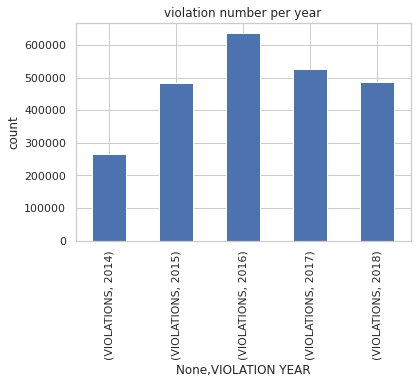

In [ ]:
df2 = df[['VIOLATIONS','VIOLATION YEAR']]

count = df2.groupby('VIOLATION YEAR')
totalsum = count.aggregate(np.sum).unstack()
totalsum.plot(kind = 'bar', title = 'violation number per year')
plt.ylabel('count')
plt.show()

In [ ]:
df[['VIOLATION YEAR','VIOLATIONS']].groupby(['VIOLATION YEAR'],as_index=True).mean()

,VIOLATIONS
VIOLATION YEAR,
2014,5.100516
2015,5.045084
2016,6.458385
2017,5.519651
2018,6.024083


In [ ]:
import plotly
import plotly.graph_objs as go
import plotly.offline as py

In [ ]:
VIOLATIONYEAR = df['VIOLATION YEAR'].value_counts()
VIOLATIONYEAR
#Selecting data to plot
data = [go.Pie(labels=VIOLATIONYEAR.index,values=VIOLATIONYEAR.values,direction='clockwise')]
# Editing style
layout = go.Layout(title='Severity of accidents',width=500,height=500)
#Creating figure
fig = go.Figure(data=data, layout=layout)
## Plotting
py.iplot(fig)

## ***Importing an other data for more information***

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Red_Light_Camera_Violations.csv')

In [ ]:
# This is for violation count
forecast_violation = pd.DataFrame(data[['VIOLATION DATE']])
forecast_violation.columns = ['Date']
forecast_violation[' violations'] = 1
# print(forecast_violation.head())

# Converting the Date into Datetime format
forecast_violation['Date'] = pd.to_datetime(forecast_violation.Date)
# print(forecast_violation.head())

# sorting the date and resetting the index
forecast_violation = forecast_violation.sort_values(by = 'Date')
forecast_violation = forecast_violation.reset_index(drop = True)

# Summing up the daily violations by month

In [ ]:
# Summing up the daily violations by month
forecast_violation_month = forecast_violation.resample('M', on = 'Date').sum()
print(forecast_violation_month)

             violations
Date                   
2014-07-31         8965
2014-08-31         8921
2014-09-30         8738
2014-10-31         8726
2014-11-30         8330
2014-12-31         8680
2015-01-31         8655
2015-02-28         7765
2015-03-31         7938
2015-04-30         7611
2015-05-31         8138
2015-06-30         7876
2015-07-31         8299
2015-08-31         8166
2015-09-30         7893
2015-10-31         8183
2015-11-30         7718
2015-12-31         7846
2016-01-31         7826
2016-02-29         7512
2016-03-31         8270
2016-04-30         8055
2016-05-31         8499
2016-06-30         8265
2016-07-31         8493
2016-08-31         8387
2016-09-30         8244
2016-10-31         8435
2016-11-30         8198
2016-12-31         8362
2017-01-31         8193
2017-02-28         7611
2017-03-31         8305
2017-04-30         7855
2017-05-31         8373
2017-06-30         7795
2017-07-31         7933
2017-08-31         7520


# Summing up the daily violations by year

In [ ]:
forecast_violation_month = forecast_violation.resample('Y', on = 'Date').sum()
print(forecast_violation_month)

             violations
Date                   
2014-12-31        52360
2015-12-31        96088
2016-12-31        98546
2017-12-31        63585


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

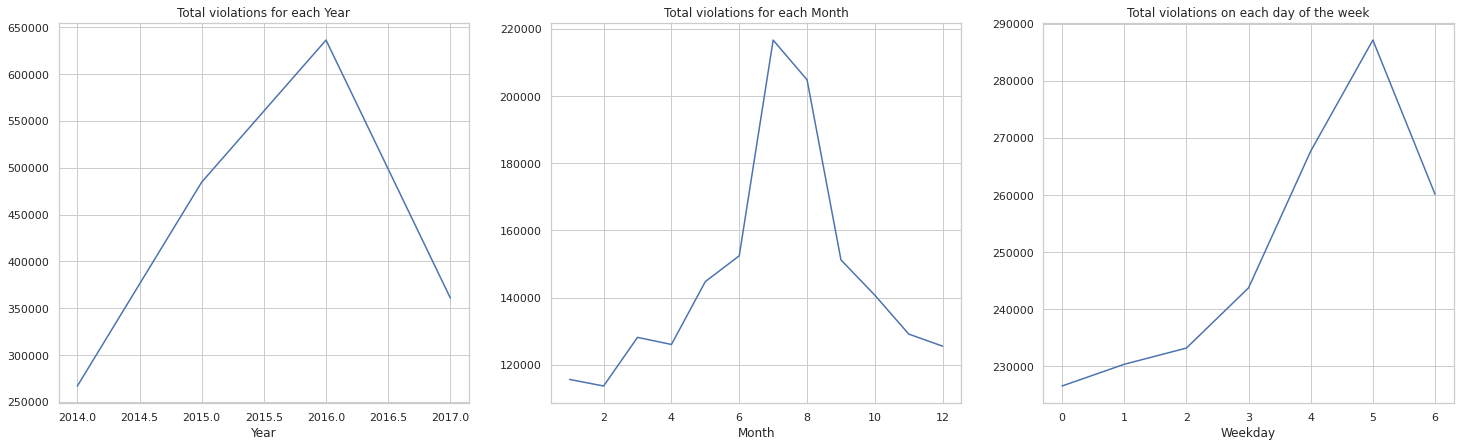

In [ ]:

#Convert VIOLATION DATE to a datetime object for sortin
import pandas as pd
data["VIOLATION DATE"]=pd.to_datetime(data["VIOLATION DATE"],format='%m/%d/%Y')
#Get rid of violations that were documented without a camaera id (<1%)
cameras=data[data['CAMERA ID'].notnull()]
cameras['ID_STRING']=cameras['CAMERA ID'].apply(lambda x: str(x))
cameras.groupby(["INTERSECTION","CAMERA ID"]).sum()['VIOLATIONS'].describe()
#There seems to be two violations at two different intersections by the same camera on two days
indices=cameras.groupby(["CAMERA ID","VIOLATION DATE"]).count()['INTERSECTION'] > 1
temp=cameras.groupby(["CAMERA ID","VIOLATION DATE"]).count()
cameras['Weekday']=cameras['VIOLATION DATE'].apply(lambda x:x.weekday())
cameras['Month']=cameras['VIOLATION DATE'].apply(lambda x:x.month)
cameras['Year']=cameras['VIOLATION DATE'].apply(lambda x:x.year)
fig, axes=plt.subplots(nrows=1,ncols=3)
fig.set_figheight(7)
fig.set_figwidth(25)
cameras.groupby('Year').sum()['VIOLATIONS'].plot(ax=axes[0],title="Total violations for each Year")
cameras.groupby('Month').sum()['VIOLATIONS'].plot(ax=axes[1],title="Total violations for each Month")
cameras.groupby('Weekday').sum()['VIOLATIONS'].plot(ax=axes[2],title="Total violations on each day of the week")

## ***Remarks***

2016 Had the highest amount of violations of any year

More of the violations occured during summer months (months 7 and8) than other times of the year

More of the violations occured during weekend days than other days, (Fri-Sun, Days 4-6 respectively)

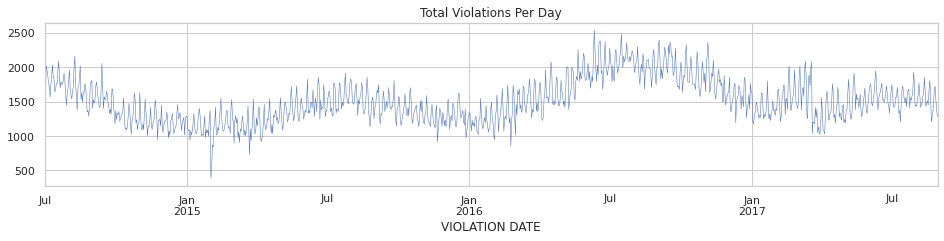

In [ ]:
#Plot Of how many violations occured on each day over the past 3 years
vls_per_day=cameras.groupby("VIOLATION DATE", sort=True).sum()['VIOLATIONS']

vls_per_day.plot.line(figsize=(16,3),lw=0.5,title="Total Violations Per Day")

## ***Remarks***

It seems the amount of violations seems to fluctuate quite nicely in a sinusoidal manner

The smaller fluctuations may be the result of higher violation counts on the weekend

The larger fluctuations may be seasonal, i.e. summer months have more violations than other times of the year

We can also see that the plot fluctuates around higher values during the year of 2016

____________________________________________________________________________________________________________________________________________________________________

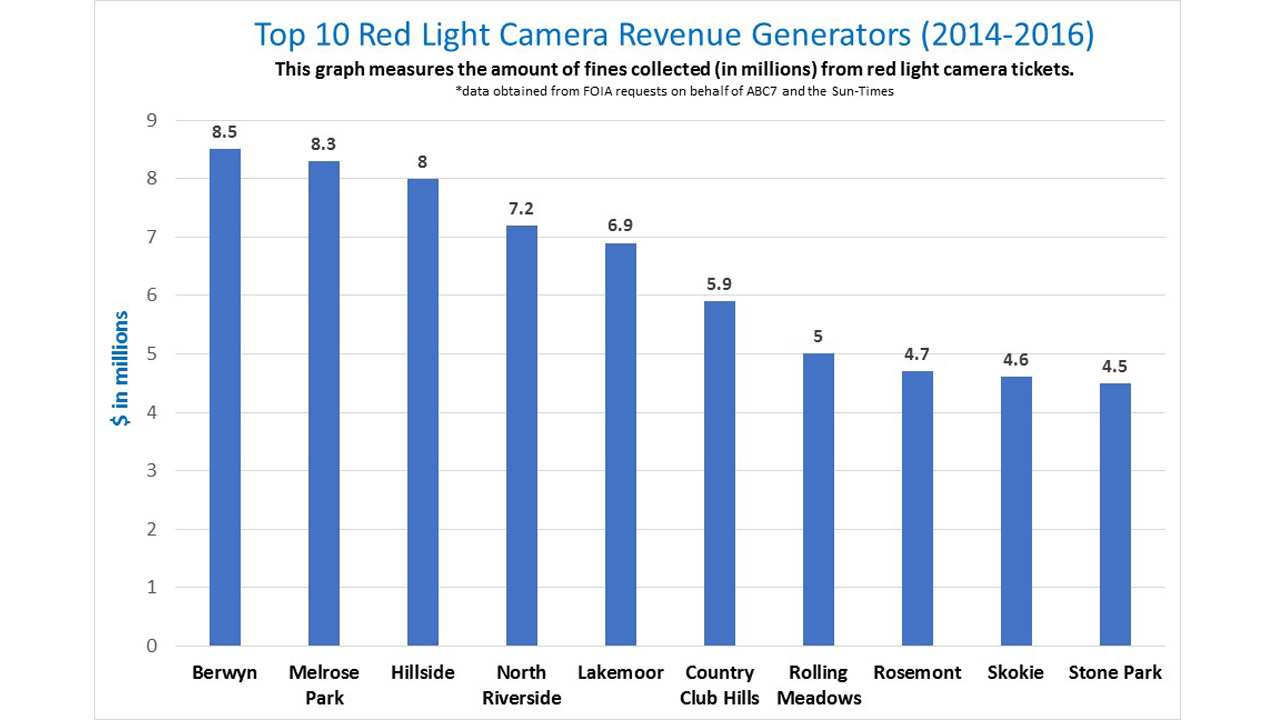

_______________________________________________________________________________________________________

### ***ADDRESS column***

In [ ]:
ADDRESS = df['ADDRESS'].value_counts()[df['ADDRESS'].value_counts()>2800]
data = [go.Bar(x=ADDRESS.index,y=ADDRESS.values,name='ADDRESS')]
layout = go.Layout(title='Address that contain the most number of violattions',width=1000,height=500)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

As we can see that the most violattions happen in the Address '800 W Roosevelt Road'

____________________________________________________________________________________________

### ***LOCATION column***

In [ ]:
ADDRESS = df['LOCATION'].value_counts()[df['LOCATION'].value_counts()>2800]
data = [go.Bar(x=ADDRESS.index,y=ADDRESS.values,name='LOCATION')]
layout = go.Layout(title='LOCATION that contain the most number of violattions',width=1000,height=500)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# ***Mapping The VIOLATIONS Locations***

In [ ]:
import folium
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df['LATITUDE'].value_counts

<bound method IndexOpsMixin.value_counts of 0         41.878245
1         41.878245
2         41.878245
3         41.878245
4         41.878245
            ...    
423255    41.931249
423256    41.778767
423257    41.771884
423258    41.878245
423259    41.779227
Name: LATITUDE, Length: 423260, dtype: float64>

In [ ]:
#first type
chicago_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")

locations = df.groupby('VIOLATIONS').first()
new_locations = locations.loc[:, ['LATITUDE', 'LONGITUDE', 'LOCATION']]

for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(chicago_map)

chicago_map

In [ ]:
#second type
MapOfChicago = folium.Map(location=[41.881832, -87.623177],
                         zoom_start=11)
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(MapOfChicago)
MapOfChicago

______________________________________________________________________________________

### ***INTERSECTION column***

In [ ]:
INTERSECTION1 = df['INTERSECTION'].value_counts()[df['INTERSECTION'].value_counts()>3080]

In [ ]:
data = [go.Bar(x=INTERSECTION1.index,y=INTERSECTION1.values,name='INTERSECTION')]
layout = go.Layout(title='INTERSECTION that contain the most number of violattions',width=1000,height=500)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

No handles with labels found to put in legend.


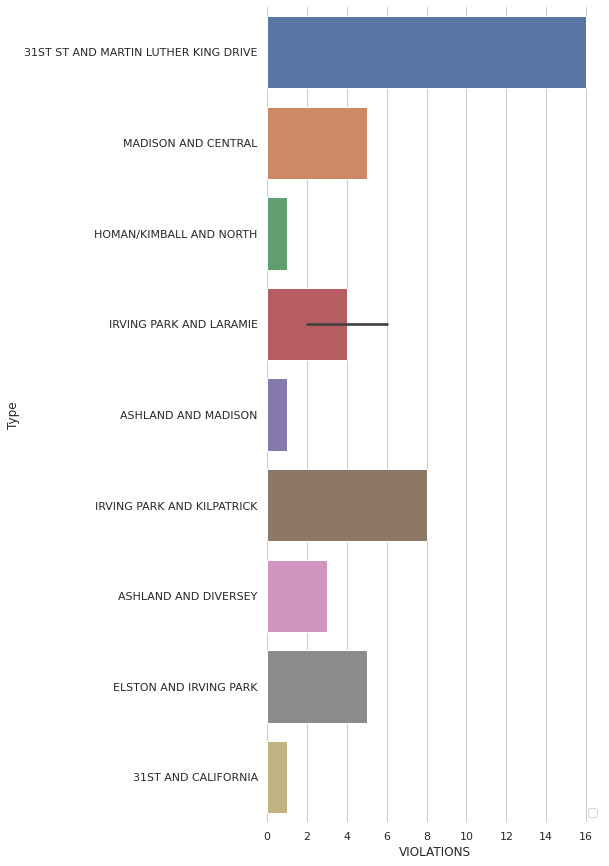

In [ ]:
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="VIOLATIONS", y="INTERSECTION", data=df.iloc[:10, :]
             )
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",
       xlabel="VIOLATIONS")
sns.despine(left=True, bottom=True)
# Add a legend and informative axis label
plt.show()


_________________________________________________________________________________________

### ***CAMERA ID column***

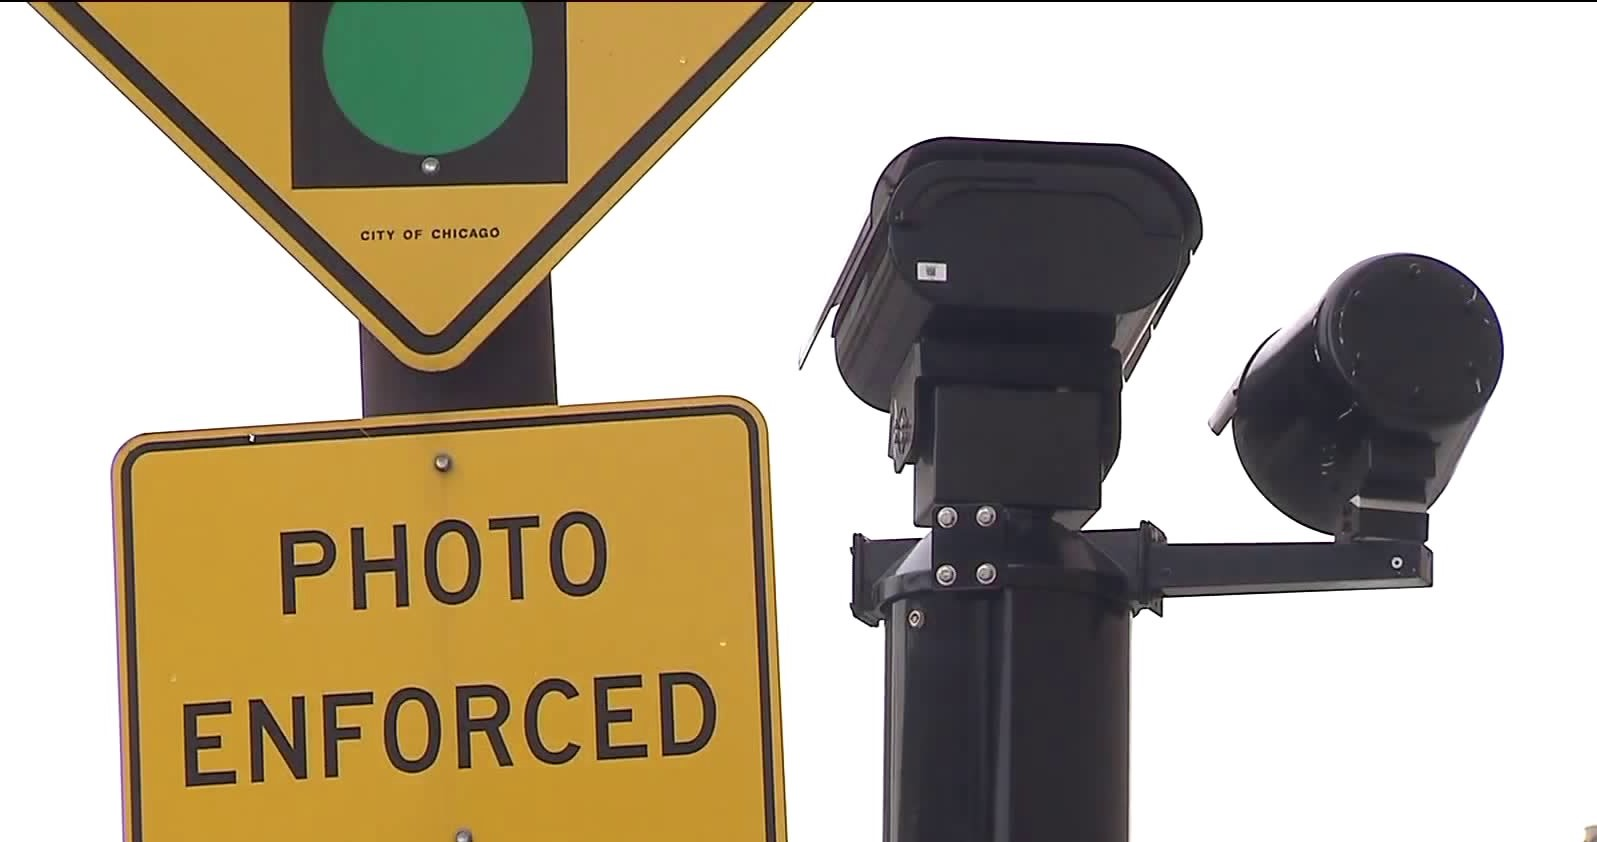

In [ ]:
df['CAMERA ID'].value_counts()>1570

1721.0     True
2054.0     True
1514.0     True
1812.0     True
1652.0     True
          ...  
1862.0    False
1062.0    False
2174.0    False
8313.0    False
8304.0    False
Name: CAMERA ID, Length: 366, dtype: bool

In [ ]:
CAMID =df['CAMERA ID'].value_counts()[df['CAMERA ID'].value_counts()>1570]
CAMID
#Selecting data to plot
data = [go.Pie(labels=CAMID.index,values=CAMID.values,direction='clockwise')]
# Editing style
layout = go.Layout(title='CAM ID',width=500,height=500)
#Creating figure
fig = go.Figure(data=data, layout=layout)
## Plotting
py.iplot(fig)

__________________________________________________________________________________________

### ***DANGER column***

In [ ]:
df["DANGER"]=np.where(df["VIOLATIONS"]>=10,"YES","NO")

In [ ]:
df.head(n=3)

,INTERSECTION,CAMERA ID,ADDRESS,VIOLATION YEAR,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,Y COORDINATE+LATITUDE,X COORDINATE+LONGITUDE,DANGER
0,31ST ST AND MARTIN LUTHER KING DRIVE,2121,3100 S DR MARTIN L KING,2014,16,1.157426e+06,1.898868e+06,41.878245,-87.697463,800 W ROOSEVELT ROAD,1.898910e+06,1.157338e+06,YES
1,MADISON AND CENTRAL,1751,0 S CENTRAL AVENUE,2014,5,1.157426e+06,1.898868e+06,41.878245,-87.697463,800 W ROOSEVELT ROAD,1.898910e+06,1.157338e+06,NO
2,HOMAN/KIMBALL AND NORTH,1771,1600 N HOMAN AVENUE,2014,1,1.157426e+06,1.898868e+06,41.878245,-87.697463,800 W ROOSEVELT ROAD,1.898910e+06,1.157338e+06,NO


In [ ]:
df['DANGER'].describe()

count     423260
unique         2
top           NO
freq      364003
Name: DANGER, dtype: object

In [ ]:
df[['DANGER','VIOLATIONS']].groupby(['DANGER'],as_index=True).mean()

,VIOLATIONS
DANGER,
NO,3.612349
YES,18.345951


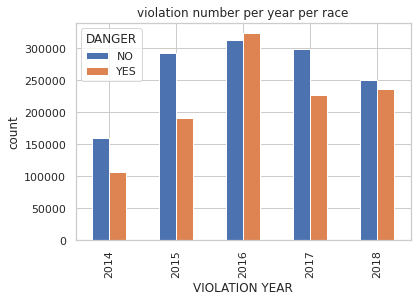

In [ ]:
df4 = df[['VIOLATIONS','DANGER','VIOLATION YEAR']]

count3 = df4.groupby(['VIOLATION YEAR','DANGER'])
totalsum = count3['VIOLATIONS'].aggregate(np.sum).unstack()
totalsum.plot(kind = 'bar', title = 'violation number per year per race')
plt.ylabel('count')
plt.show()

__________________________________________________________________________________________________________

________________________________________________________________________________________________

#**Machine learning part**

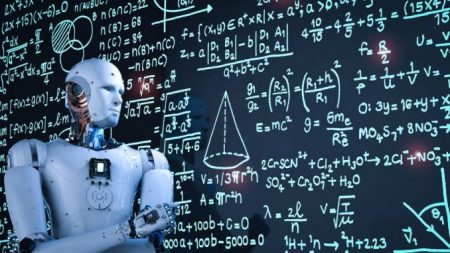

In [ ]:
df.head()

,INTERSECTION,CAMERA ID,ADDRESS,VIOLATION YEAR,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,Y COORDINATE+LATITUDE,X COORDINATE+LONGITUDE,DANGER
0,31ST ST AND MARTIN LUTHER KING DRIVE,2121,3100 S DR MARTIN L KING,2014,16,1.157426e+06,1.898868e+06,41.878245,-87.697463,800 W ROOSEVELT ROAD,1.898910e+06,1.157338e+06,YES
1,MADISON AND CENTRAL,1751,0 S CENTRAL AVENUE,2014,5,1.157426e+06,1.898868e+06,41.878245,-87.697463,800 W ROOSEVELT ROAD,1.898910e+06,1.157338e+06,NO
2,HOMAN/KIMBALL AND NORTH,1771,1600 N HOMAN AVENUE,2014,1,1.157426e+06,1.898868e+06,41.878245,-87.697463,800 W ROOSEVELT ROAD,1.898910e+06,1.157338e+06,NO
3,IRVING PARK AND LARAMIE,1533,5200 W IRVING PARK ROA,2014,6,1.157426e+06,1.898868e+06,41.878245,-87.697463,800 W ROOSEVELT ROAD,1.898910e+06,1.157338e+06,NO
4,ASHLAND AND MADISON,1911,0 N ASHLAND AVE,2014,1,1.157426e+06,1.898868e+06,41.878245,-87.697463,800 W ROOSEVELT ROAD,1.898910e+06,1.157338e+06,NO


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['ADDRESS']=encoder.fit_transform(df['ADDRESS'])
df['INTERSECTION']=encoder.fit_transform(df['INTERSECTION'])
df['LOCATION']=encoder.fit_transform(df['LOCATION'])
df['DANGER']=encoder.fit_transform(df['DANGER'])
df.head()

,INTERSECTION,CAMERA ID,ADDRESS,VIOLATION YEAR,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,Y COORDINATE+LATITUDE,X COORDINATE+LONGITUDE,DANGER
0,4,2121,116,2014,16,1.157426e+06,1.898868e+06,41.878245,-87.697463,0,1.898910e+06,1.157338e+06,1
1,126,1751,2,2014,5,1.157426e+06,1.898868e+06,41.878245,-87.697463,0,1.898910e+06,1.157338e+06,0
2,100,1771,35,2014,1,1.157426e+06,1.898868e+06,41.878245,-87.697463,0,1.898910e+06,1.157338e+06,0
3,104,1533,217,2014,6,1.157426e+06,1.898868e+06,41.878245,-87.697463,0,1.898910e+06,1.157338e+06,0
4,32,1911,0,2014,1,1.157426e+06,1.898868e+06,41.878245,-87.697463,0,1.898910e+06,1.157338e+06,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423260 entries, 0 to 423259
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   INTERSECTION            423260 non-null  int64  
 1   CAMERA ID               423260 non-null  object 
 2   ADDRESS                 423260 non-null  int64  
 3   VIOLATION YEAR          423260 non-null  object 
 4   VIOLATIONS              423260 non-null  int64  
 5   X COORDINATE            423260 non-null  float64
 6   Y COORDINATE            423260 non-null  float64
 7   LATITUDE                423260 non-null  float64
 8   LONGITUDE               423260 non-null  float64
 9   LOCATION                423260 non-null  int64  
 10  Y COORDINATE+LATITUDE   423260 non-null  float64
 11  X COORDINATE+LONGITUDE  423260 non-null  float64
 12  DANGER                  423260 non-null  int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 42.0+ MB


In [ ]:

df['VIOLATION YEAR']=df['VIOLATION YEAR'].astype('int')

In [ ]:
#features extraction
x=df[['INTERSECTION','VIOLATION YEAR','ADDRESS','LOCATION','LONGITUDE','LATITUDE']]
y = df['DANGER']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
logreg.score(x_test,y_test)

0.8600454971952397

In [ ]:
confution_matrix=pd.crosstab(y_test,y_pred)
print(confution_matrix)

col_0        0
DANGER        
0       127408
1        20733


In [ ]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#applying tree algorithm
tree = tree.DecisionTreeClassifier()
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.9065619916160955


In [ ]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Changing parameters
tree = tree.DecisionTreeClassifier(max_depth=10,random_state=10)
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8977258152705868


In [ ]:
#Changing parameters
tree = DecisionTreeClassifier(max_depth=10,random_state=110)
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8977258152705868
